# Name: Norhan Swar
# ID: 231000486

In [1]:
!pip install yellowbrick 

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 1.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import warnings
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


In [3]:
from yellowbrick.cluster import KElbowVisualizer

In [4]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [5]:
data = data.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Genre' : 'Gender',
                              'Spending Score (1-100)': 'Score'})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


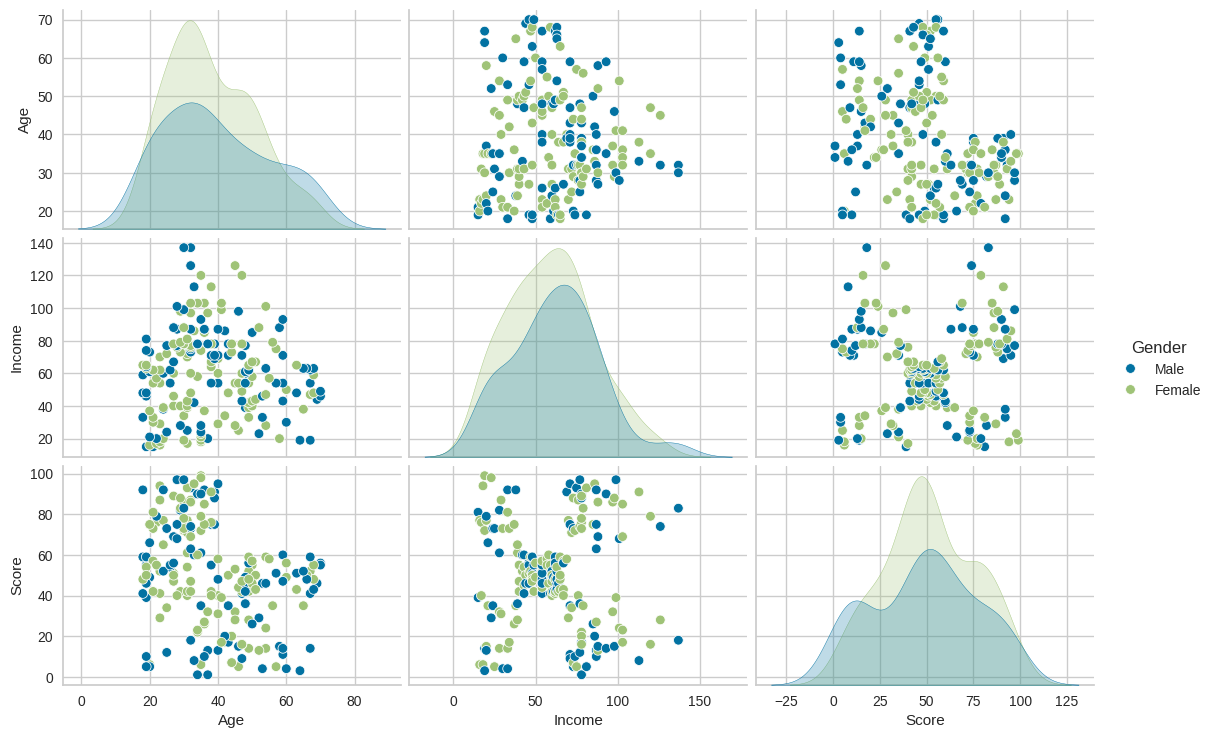

In [7]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(data.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

In [9]:
data['Gender'] = data['Gender'].apply(lambda x: 0 if x == 'Male'else 1)
data.head()


CustomerID  Gender  Age  Income  Score
0           1       1   19      15     39
1           2       1   21      15     81
2           3       1   20      16      6
3           4       1   23      16     77
4           5       1   31      17     40

In [10]:
X = data.drop(['CustomerID'], axis=1)

/home/norhan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/norhan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/norhan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/norhan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

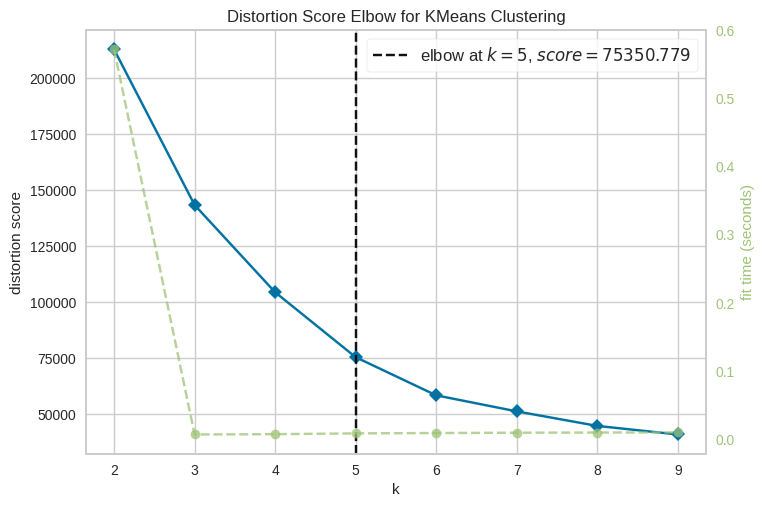

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

### K = 5

/home/norhan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


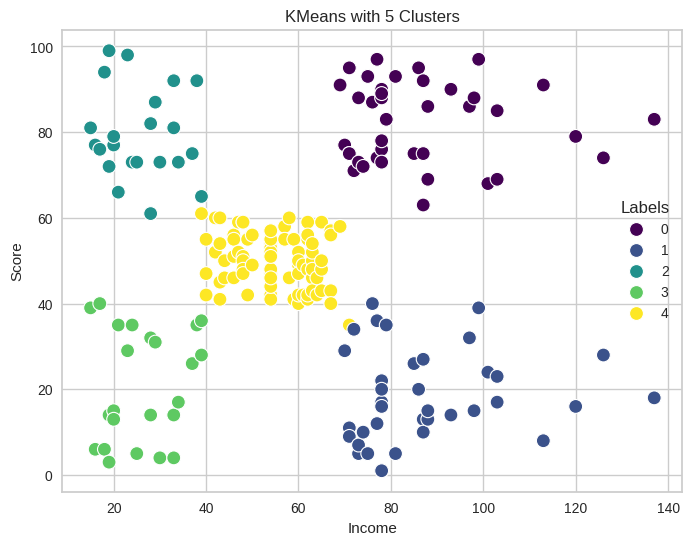

In [13]:
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Score', data=X, hue='Labels', palette='viridis', s=100)
plt.title('KMeans with 5 Clusters')
plt.show()

/home/norhan/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/norhan/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/norhan/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/norhan/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/norhan/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: User

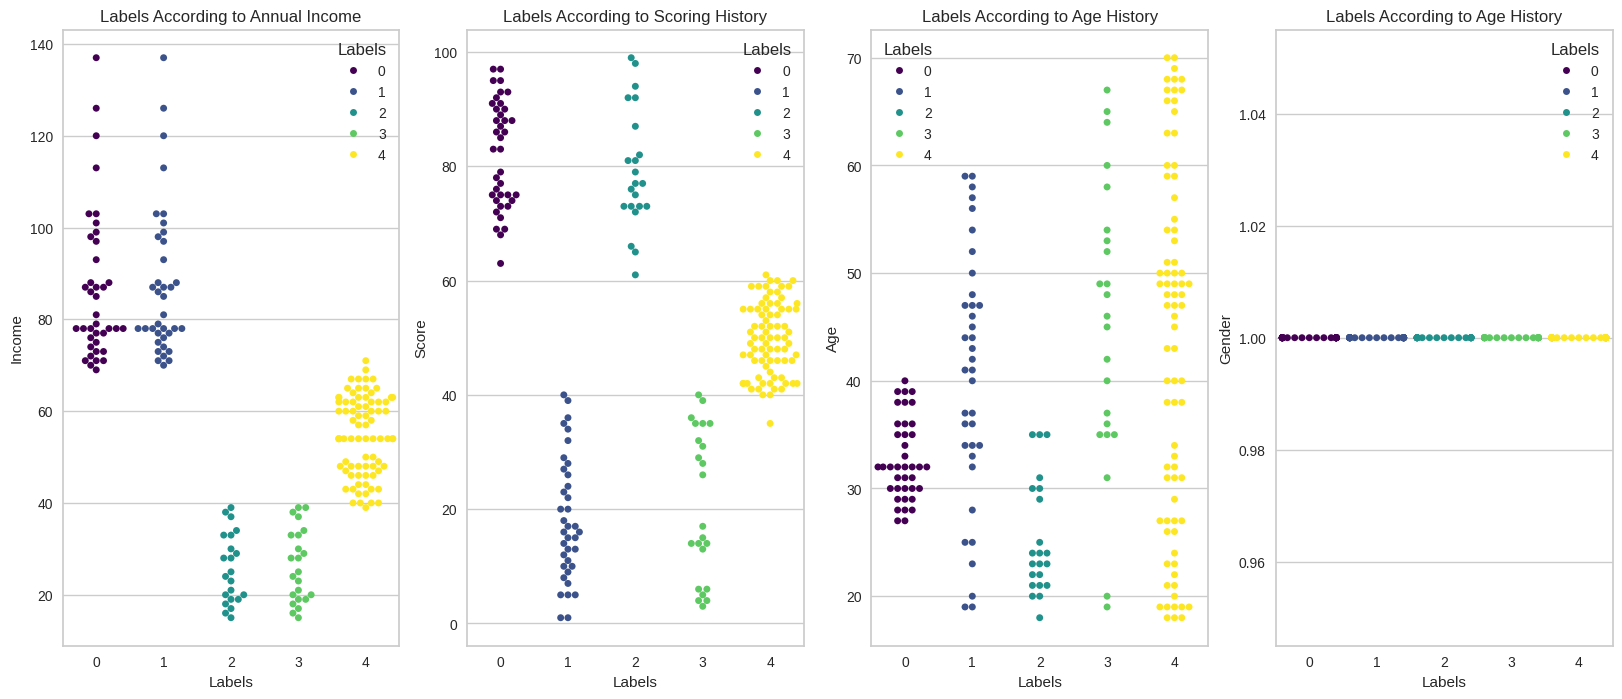

In [14]:
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(141)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax, hue='Labels', palette='viridis')
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(142)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax, hue='Labels', palette='viridis')
ax.set_title('Labels According to Scoring History')

ax = fig.add_subplot(143)
sns.swarmplot(x='Labels', y='Age', data=X, ax=ax, hue='Labels', palette='viridis')
ax.set_title('Labels According to Age History')

ax = fig.add_subplot(144)
sns.swarmplot(x='Labels', y='Gender', data=X, ax=ax, hue='Labels', palette='viridis')
ax.set_title('Labels According to Age History')

plt.show()


Label 0 Purple is mid income and mid spending<br>
Label 1 Blue is high income and low spending<br>
Label 2 Blushgreen is high income and high spending<br>
Label 3 Green is low income and low spending<br>
Label 4 Yellow is low income and high spending<br>

## Agglomerative Clustering

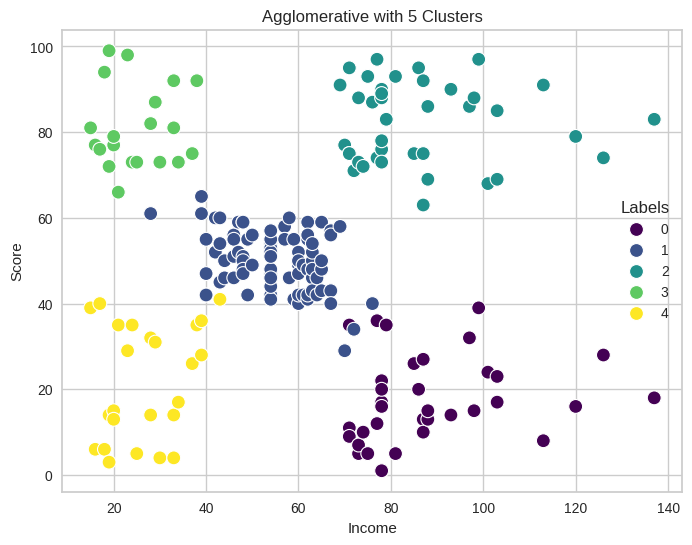

In [15]:
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Score', data=X, hue='Labels', palette='viridis', s=100)
plt.title('Agglomerative with 5 Clusters')
plt.show()

distance matrix contains the distance from each point to every other point of a dataset

In [16]:
dist = distance_matrix(X, X)
dist

array([[  0.        ,  42.05948169,  33.03028913, ..., 117.12813496,
        124.53915047, 130.17296186],
       [ 42.05948169,   0.        ,  75.01999733, ..., 111.76761606,
        137.77880824, 122.35195135],
       [ 33.03028913,  75.01999733,   0.        , ..., 129.89226305,
        122.24974438, 143.78456106],
       ...,
       [117.12813496, 111.76761606, 129.89226305, ...,   0.        ,
         57.10516614,  14.35270009],
       [124.53915047, 137.77880824, 122.24974438, ...,  57.10516614,
          0.        ,  65.06150936],
       [130.17296186, 122.35195135, 143.78456106, ...,  14.35270009,
         65.06150936,   0.        ]])

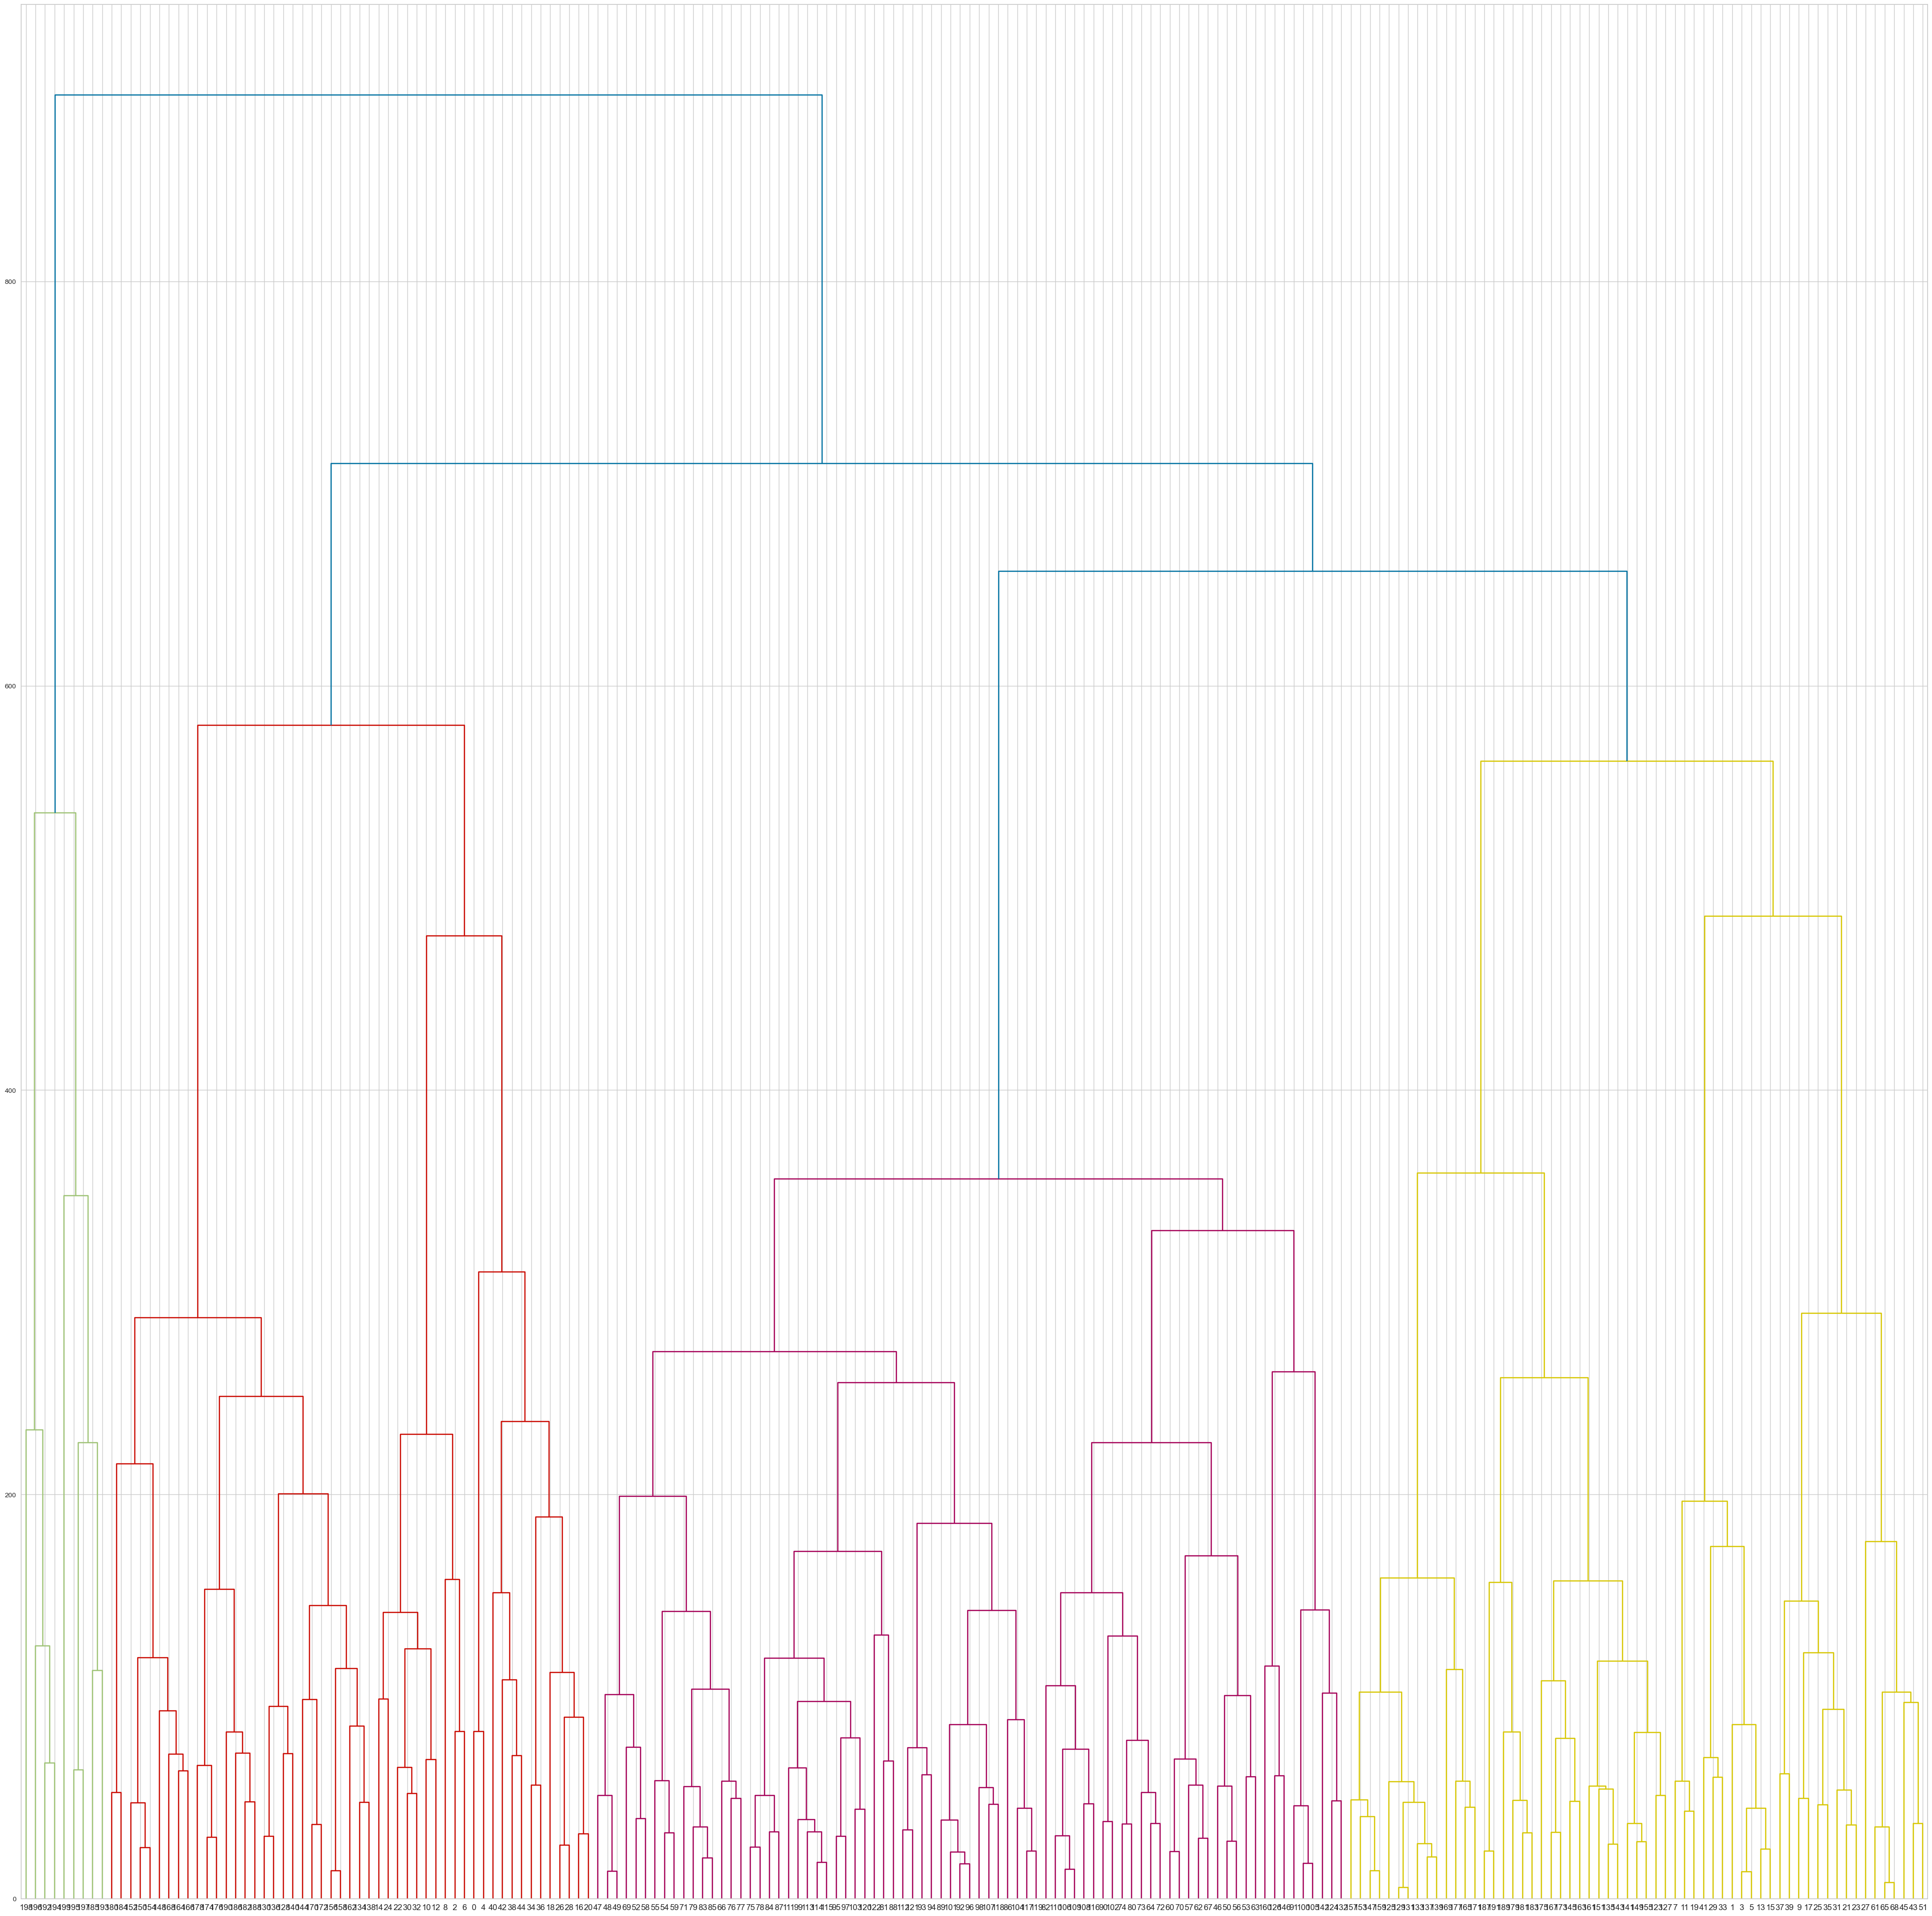

In [37]:
Z = hierarchy.linkage(dist, 'complete')
plt.figure(figsize=(50, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='top')

/tmp/ipykernel_332739/1544261838.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'average')


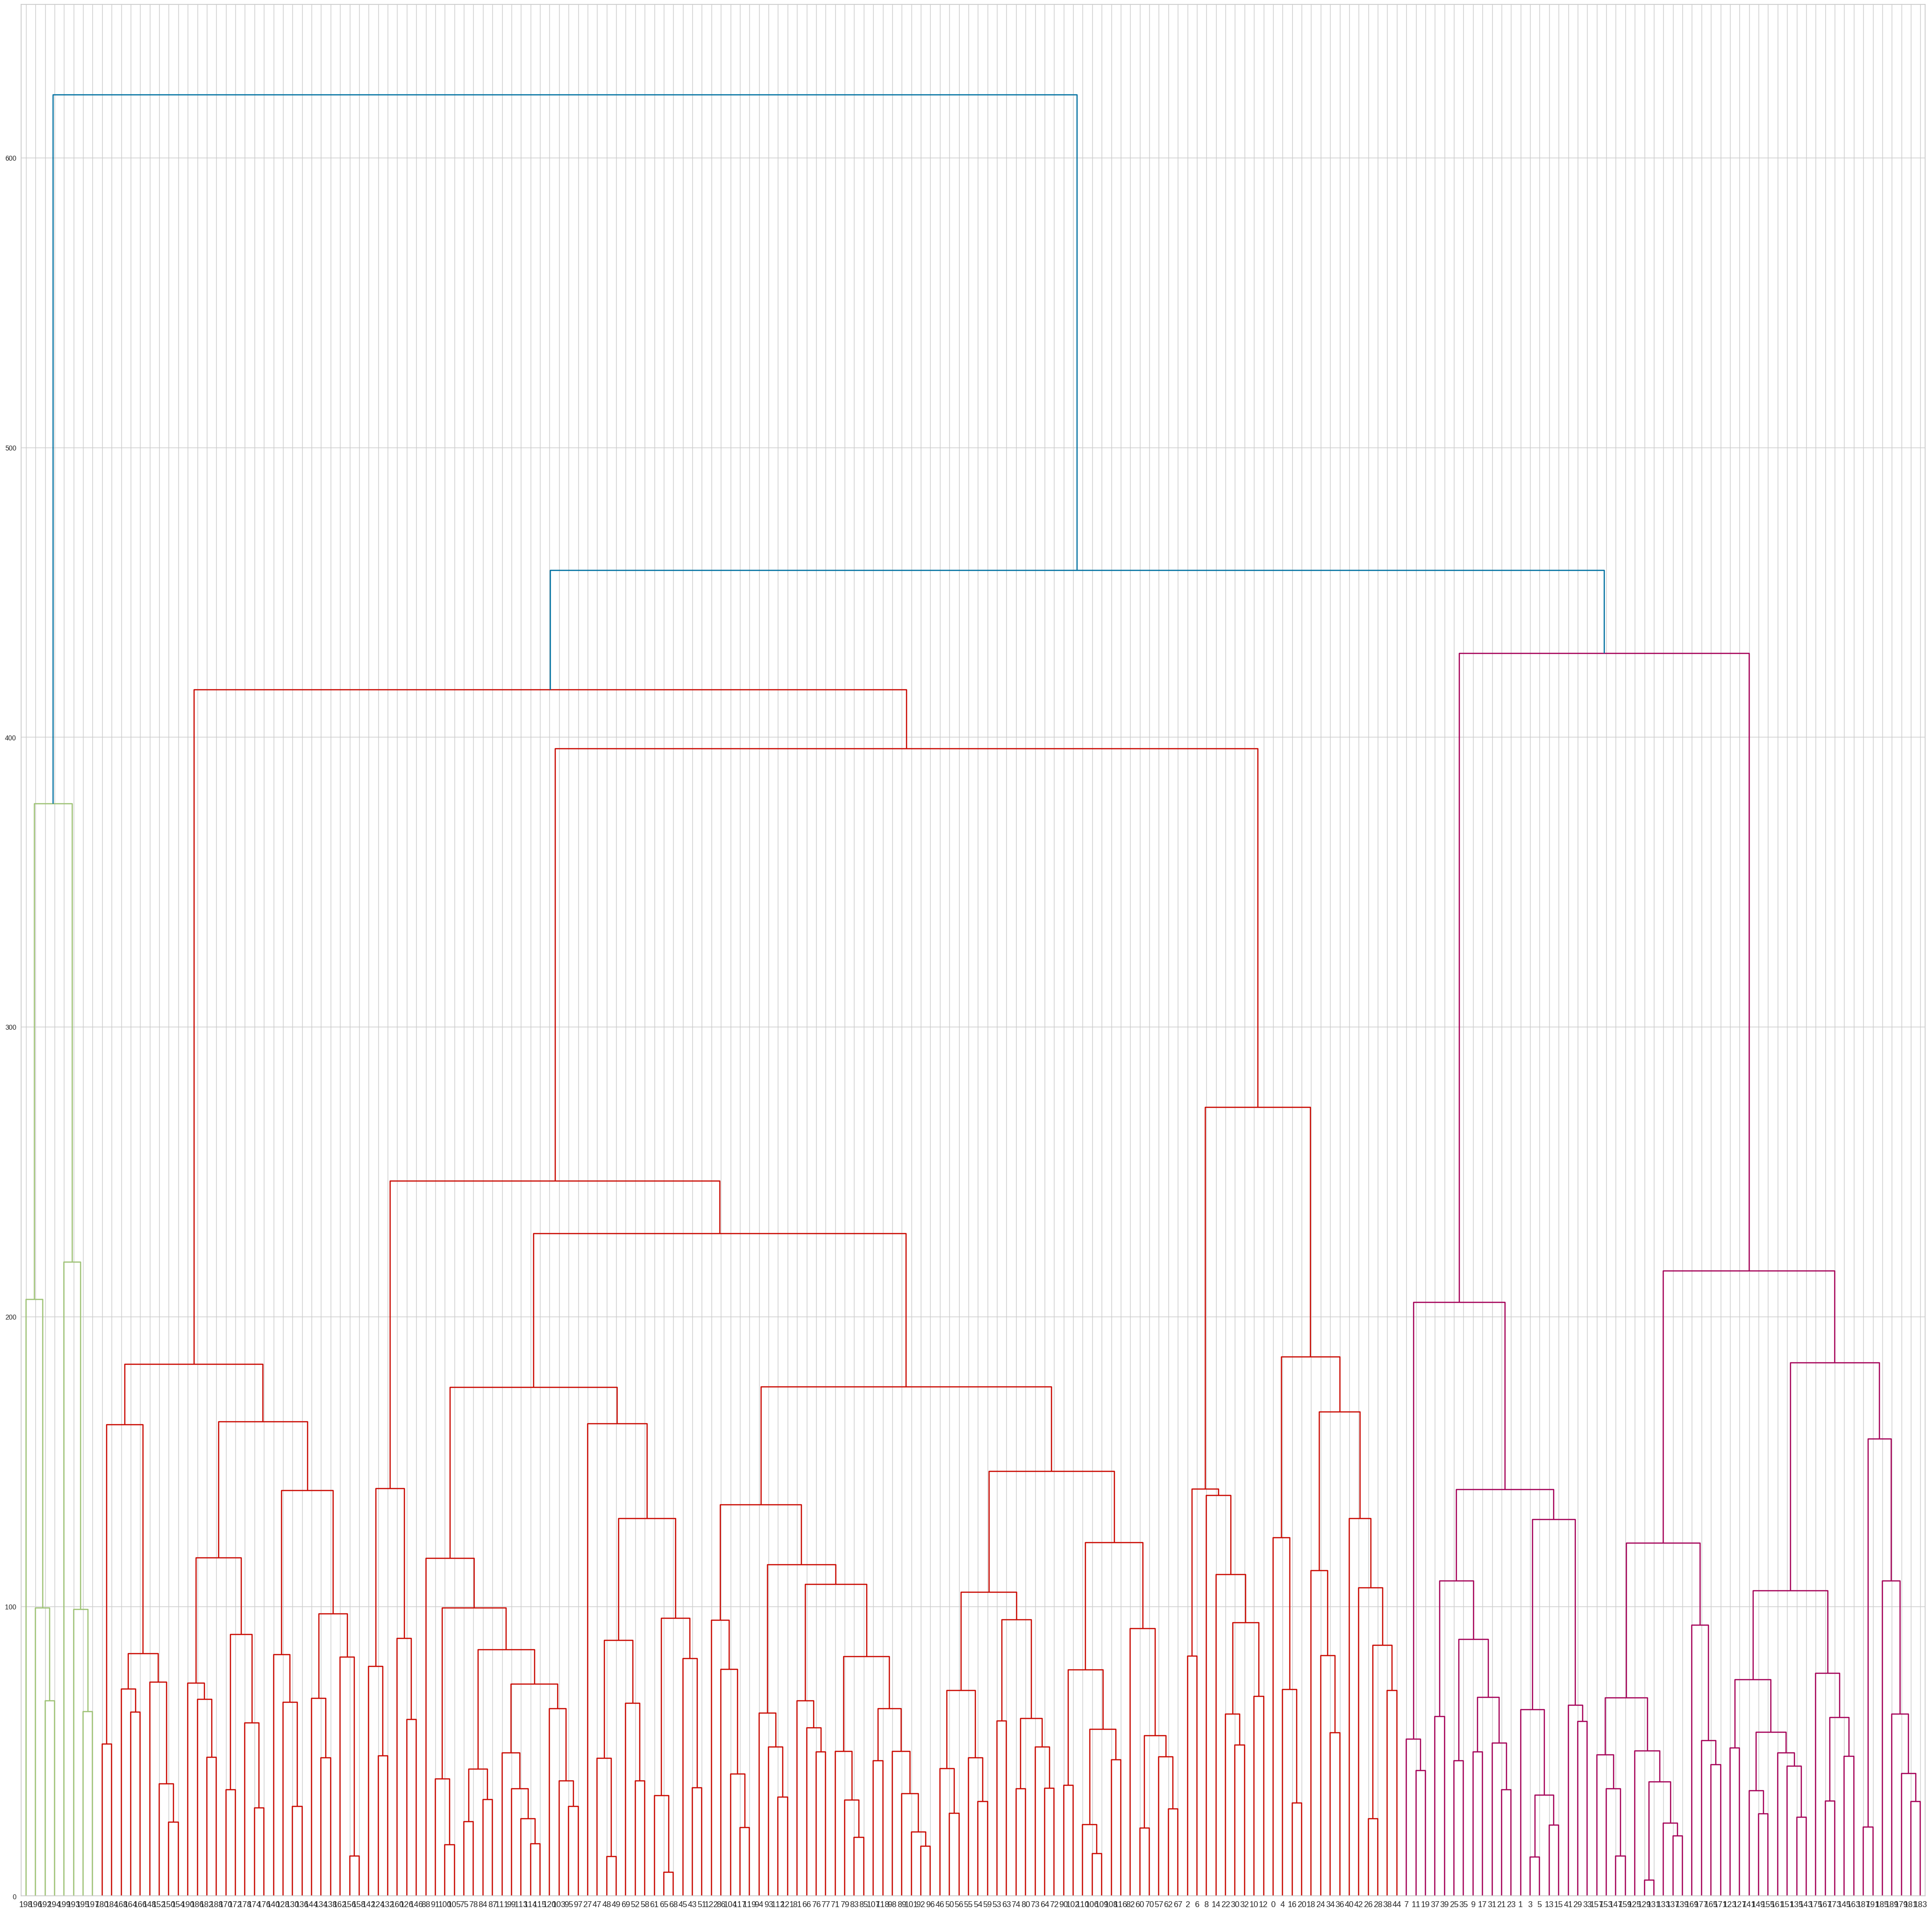

In [17]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(50, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'top')

## Lab Task
### cluster wine dataset using kmean and Agglomerative with a good visualization

In [37]:
wine= pd.read_csv('wine-clustering.csv')


In [38]:
wine.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [39]:
wine.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

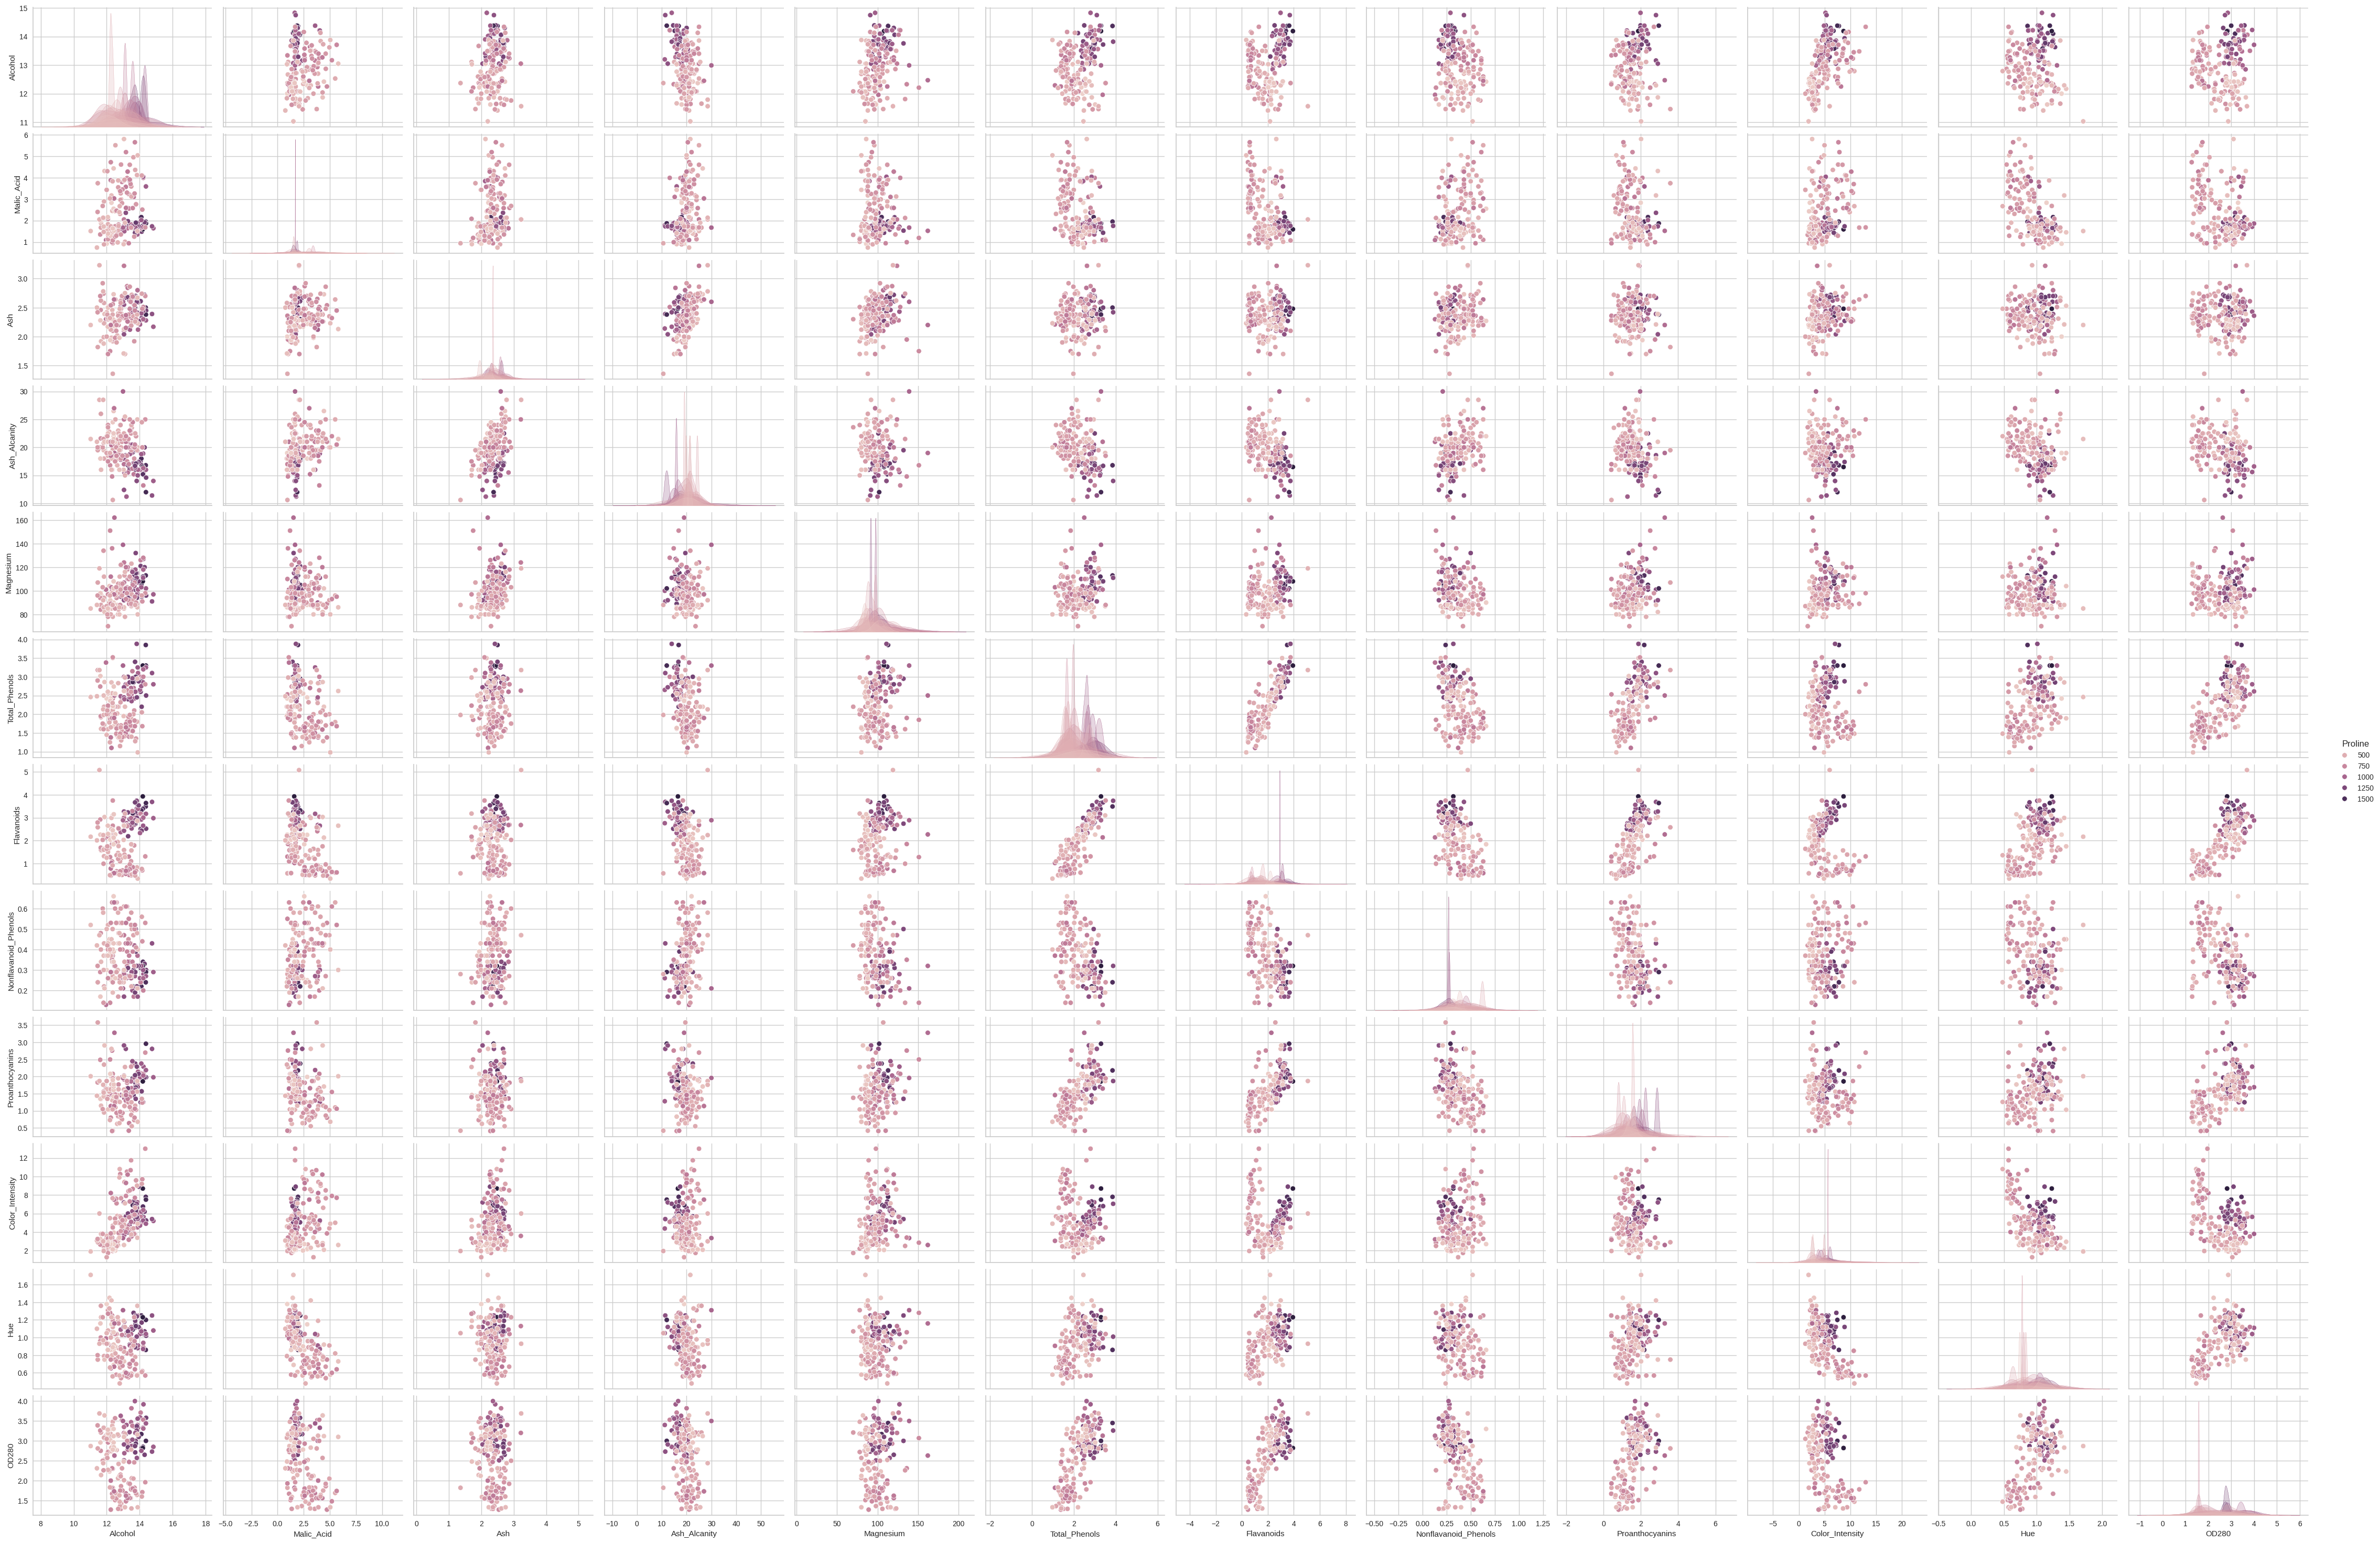

In [40]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(wine, hue='Proline', aspect=1.5)
plt.show()


In [41]:
# Preprocess the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine)


/home/norhan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/norhan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/norhan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/norhan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

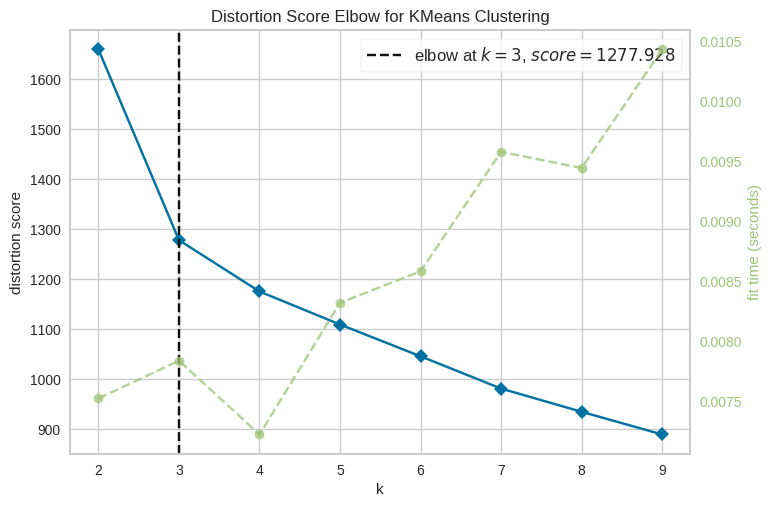

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show() 

In [42]:
    # Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_



/home/norhan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'K-means Clustering')

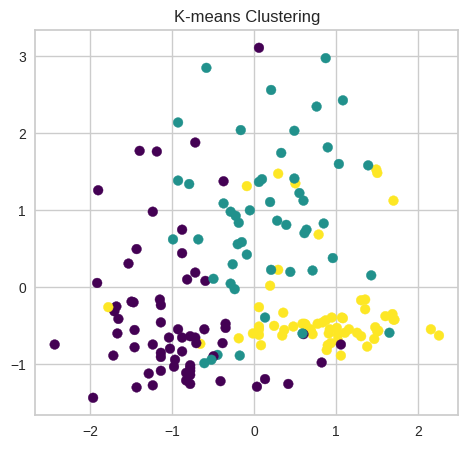

In [48]:
    # Create scatter plots of the K-means and Agglomerative clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')


In [44]:
    # Apply Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(X_scaled)


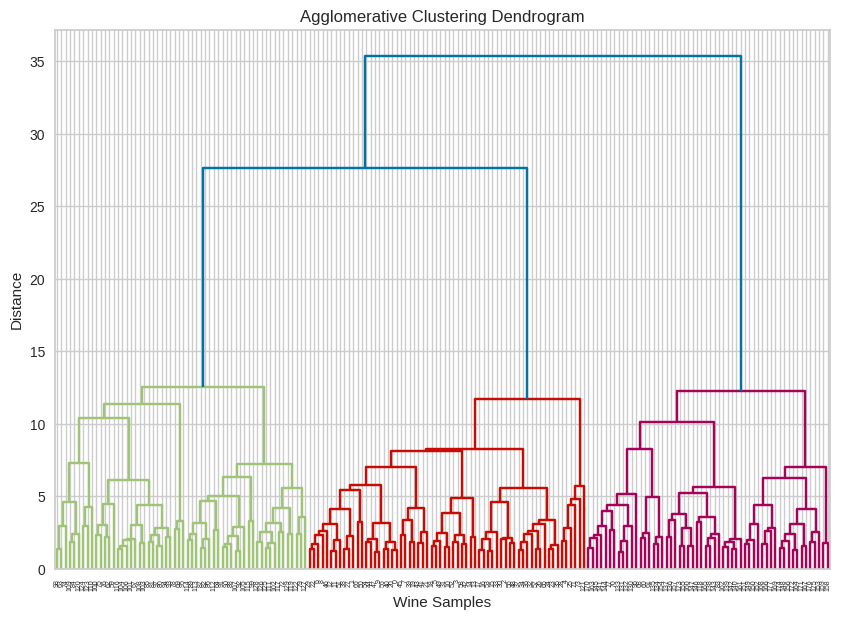

In [45]:
    # Create dendrogram for Agglomerative clustering
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X_scaled, method='ward', metric='euclidean')
plt.figure(figsize=(10, 7))
plt.title('Agglomerative Clustering Dendrogram')
dendrogram(linkage_matrix,
               labels=wine.index,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True)
plt.xlabel('Wine Samples')
plt.ylabel('Distance')
plt.show()


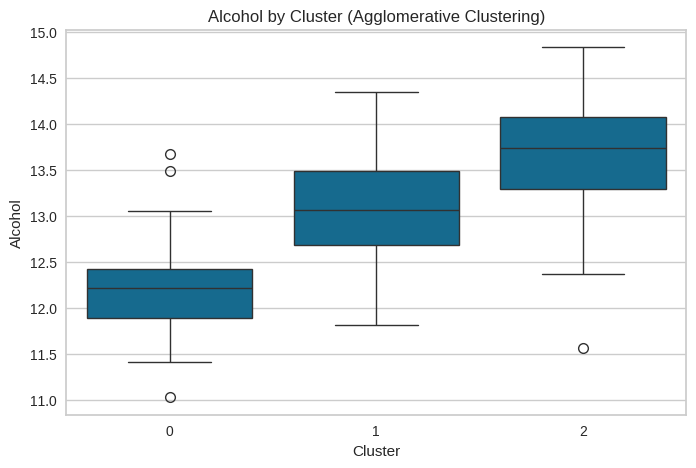

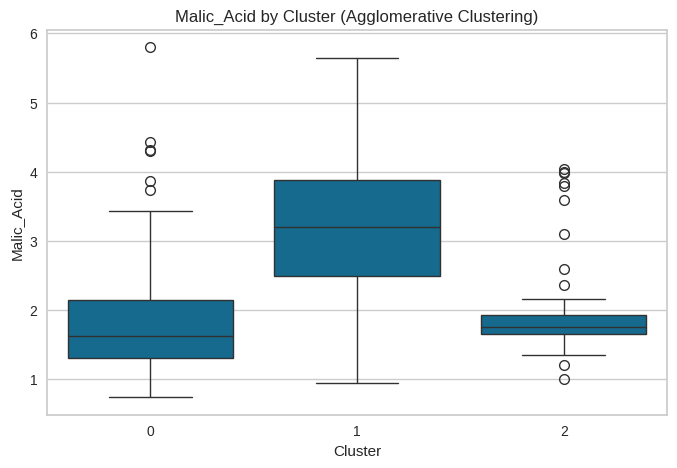

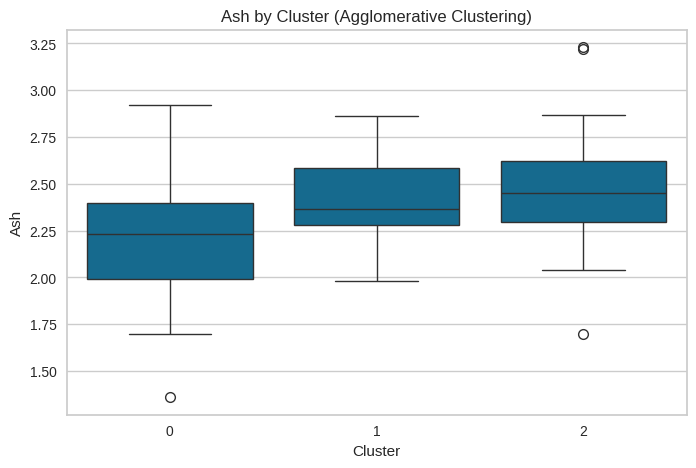

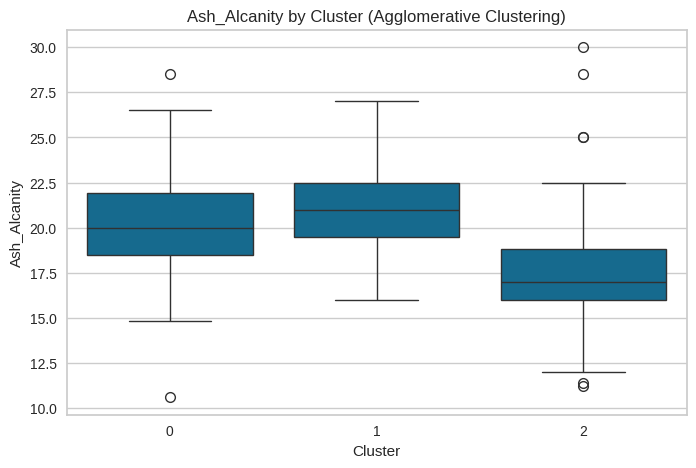

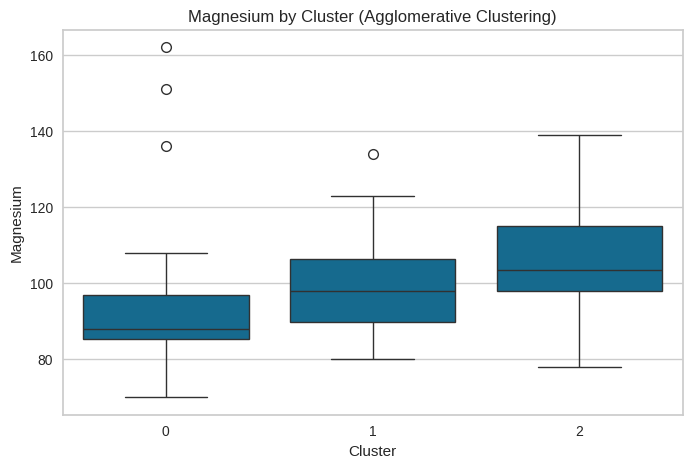

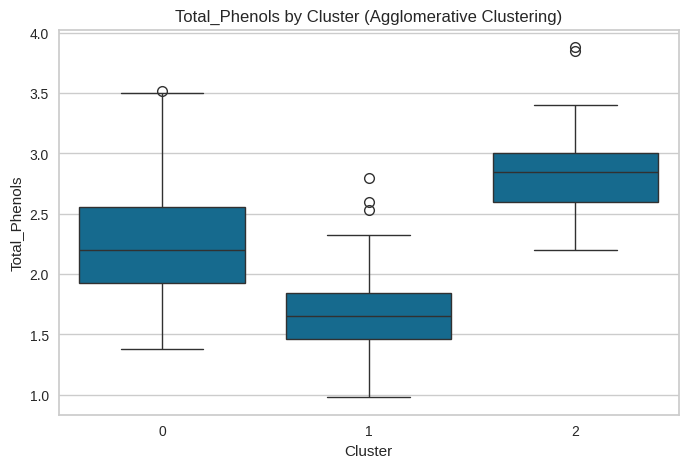

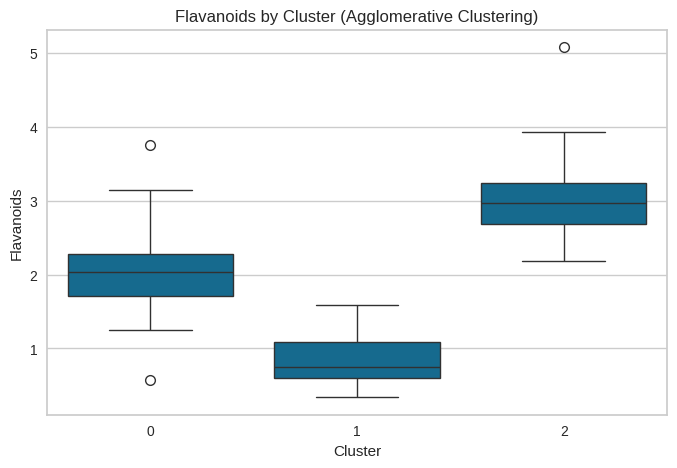

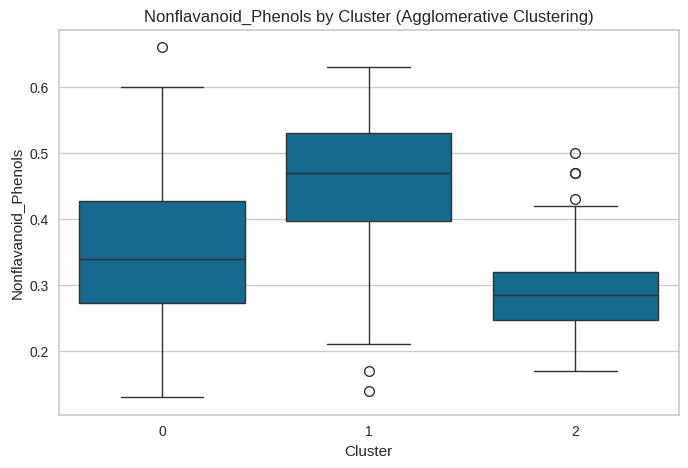

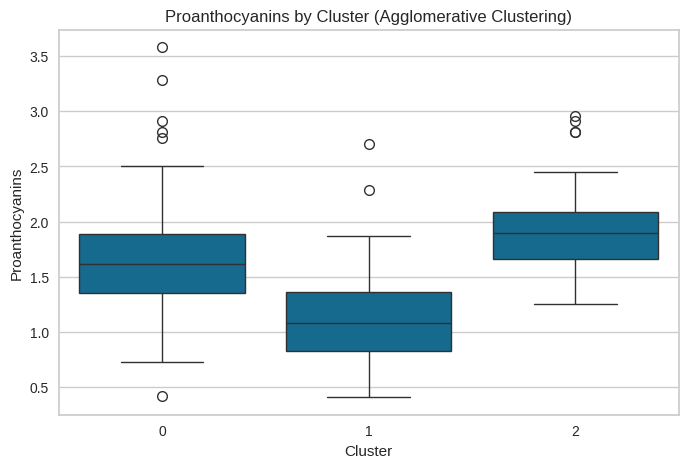

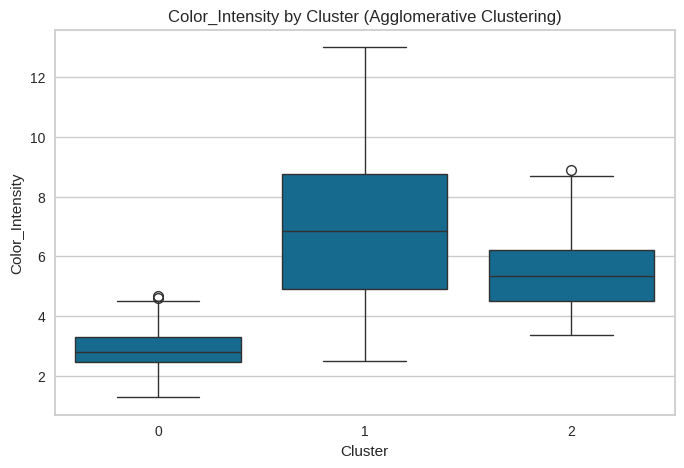

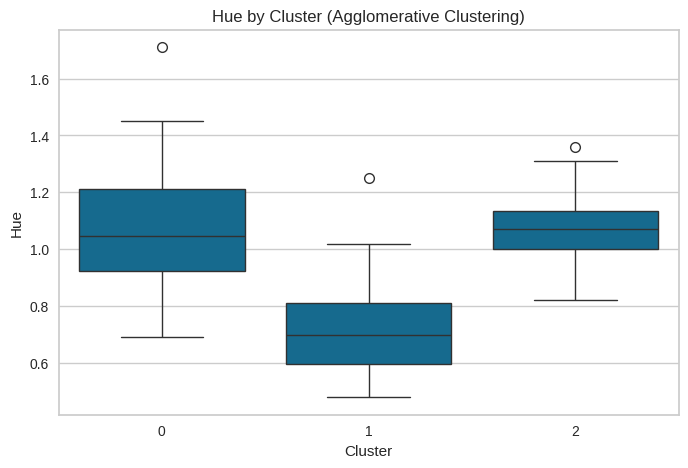

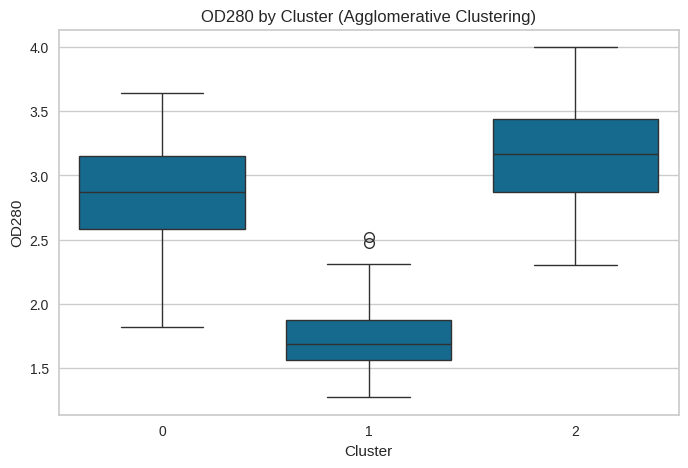

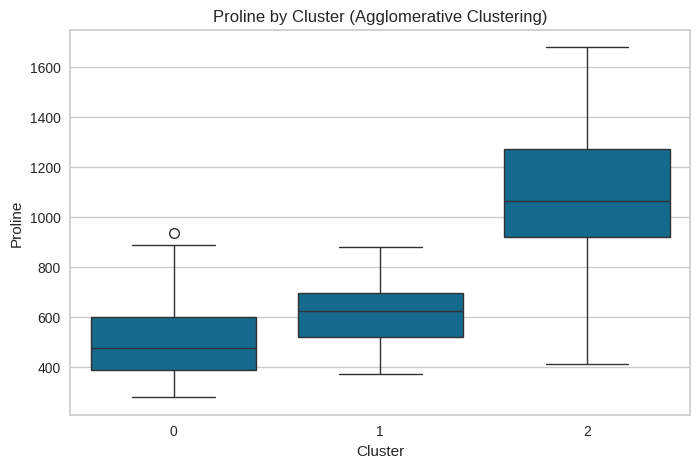

In [46]:
    # Create box plots for each feature grouped by cluster
features = wine.columns
for feature in features:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=agglomerative_labels, y=wine[feature])
        plt.title(f'{feature} by Cluster (Agglomerative Clustering)')
        plt.xlabel('Cluster')
        plt.ylabel(feature)
        plt.show()

